In [45]:
import keras
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

#### Classification

Pobieramy nasz dataset

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
X_train_full.shape

(60000, 28, 28)

In [4]:
X_train_full.dtype

dtype('uint8')

Normalizujemy wartości, tym razem nie StandardScaler (chociaż nim też można)

In [5]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

Klasy mają postać liczbową, więc potrzebujemy czegoś do opisu dla czytelności

In [6]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

Tworzymy nasz model - narazie tylko architektura sieci

In [19]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [20]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_5 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

Kompilujemy nasz model, czyli w skrócie wybieramy funkcję kosztu, optimizer i metryki do opisu

In [23]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd", 
             metrics=["accuracy"])

Podczas trenowania sieci na output dostajemy całą historię, ultra przydatna rzecz, oczywiście zapisujemy

In [12]:
history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid))

Instructions for updating:
Use tf.cast instead.
Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 6s 109us/step - loss: 0.7069 - acc: 0.7702 - val_loss: 0.5054 - val_acc: 0.8414
Epoch 2/30
55000/55000 [==============================] - 6s 100us/step - loss: 0.4909 - acc: 0.8292 - val_loss: 0.4368 - val_acc: 0.8554
Epoch 3/30
55000/55000 [==============================] - 6s 107us/step - loss: 0.4465 - acc: 0.8441 - val_loss: 0.4409 - val_acc: 0.8522
Epoch 4/30
55000/55000 [==============================] - 6s 101us/step - loss: 0.4194 - acc: 0.8540 - val_loss: 0.4263 - val_acc: 0.8516
Epoch 5/30
55000/55000 [==============================] - 6s 107us/step - loss: 0.3994 - acc: 0.8600 - val_loss: 0.4254 - val_acc: 0.8548
Epoch 6/30
55000/55000 [==============================] - 6s 109us/step - loss: 0.3833 - acc: 0.8651 - val_loss: 0.3769 - val_acc: 0.8690
Epoch 7/30
55000/55000 [==============================] - 6s 103us/step - l

In [24]:
history = model.fit(X_train, y_train, epochs=30, 
                   validation_data=(X_valid, y_valid),
                   batch_size=1000)

Train on 55000 samples, validate on 5000 samples
Epoch 1/30
55000/55000 [==============================] - 1s 26us/step - loss: 1.9200 - acc: 0.4474 - val_loss: 1.5723 - val_acc: 0.6652
Epoch 2/30
55000/55000 [==============================] - 1s 20us/step - loss: 1.3646 - acc: 0.6683 - val_loss: 1.1724 - val_acc: 0.6882
Epoch 3/30
55000/55000 [==============================] - 1s 19us/step - loss: 1.0829 - acc: 0.6858 - val_loss: 0.9804 - val_acc: 0.7062
Epoch 4/30
55000/55000 [==============================] - 1s 19us/step - loss: 0.9391 - acc: 0.7070 - val_loss: 0.8749 - val_acc: 0.7282
Epoch 5/30
55000/55000 [==============================] - 1s 21us/step - loss: 0.8537 - acc: 0.7272 - val_loss: 0.8062 - val_acc: 0.7464
Epoch 6/30
55000/55000 [==============================] - 1s 19us/step - loss: 0.7965 - acc: 0.7420 - val_loss: 0.7587 - val_acc: 0.7584
Epoch 7/30
55000/55000 [==============================] - 1s 24us/step - loss: 0.7548 - acc: 0.7540 - val_loss: 0.7234 - val_acc:

Kilka wykresów od keras.io jak ładnie pokazać skuteczność i funkcję kosztu sieci

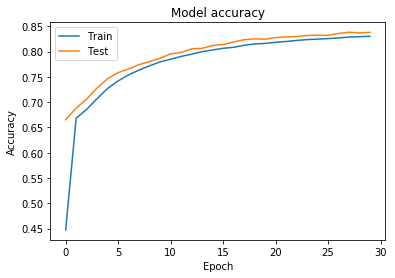

In [25]:

plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

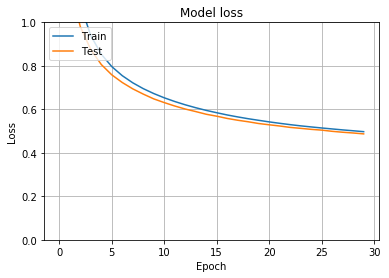

In [26]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

Na koniec ewaluacja i predykcja :)

In [36]:
model.evaluate(X_test / 255.0, y_test)

10000/10000 [==============================] - 0s 31us/step


[0.5219006799697876, 0.821]

Predicting values

In [41]:
X_new = X_test[:5] / 255.0
y_proba = model.predict(X_new)
y_proba.round(2)

ValueError: Error when checking input: expected flatten_2_input to have 3 dimensions, but got array with shape (5, 8)

In [42]:
y_classes = model.predict_classes(X_new)
np.array(class_names)[y_classes]

ValueError: Error when checking input: expected flatten_2_input to have 3 dimensions, but got array with shape (5, 8)

#### REGRESSION

In [38]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled = scaler.transform(X_test)

In [ ]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer="sgd")
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))


In [ ]:
mse_test = model.evaluate(X_test, y_test)

In [ ]:
X_new = X_test[:3]
y_pred = model.predict(X_new)

Callbacks

In [ ]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("dl_model.h5",
                                                save_best_only=True)
history = model.fit(X_train, y_train, epochs=10,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb])
model = keras.models.load_model("dl_model.h5")

Hyperparameter tuning

https://towardsdatascience.com/hyperparameter-optimization-with-keras-b82e6364ca53